In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
data = pd.read_csv('data/train.csv')

In [5]:
X = data.iloc[:, 0:20]
y = data.iloc[:, -1]

### Feature Selection Using Feature importance

In [9]:
model = ExtraTreesClassifier()

model.fit(X, y)
print(model.feature_importances_)

[0.2121605  0.0186868  0.1593017  0.01782461 0.14786341 0.03482782
 0.40933515]


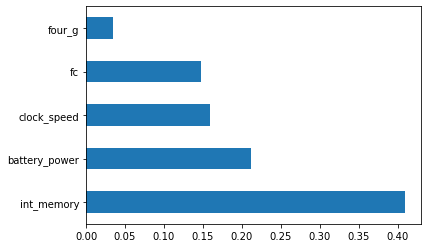

In [13]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh');

### Feature Selection using SelectKBest

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
best_features = SelectKBest(score_func = chi2, k = 5)
fit = best_features.fit(X, y)

In [16]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

scores = pd.concat([dfcolumns, dfscores], axis = 1)
scores.columns = ['specs', 'score']

print(scores.nlargest(5, 'score'))

           specs         score
6     int_memory  20539.050302
0  battery_power  11058.155685
4             fc    290.812265
1           blue     36.976457
3       dual_sim     36.485969


### Feature Selection Using Seaborn Heatmap

In [17]:
import seaborn as sns

In [19]:
correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index

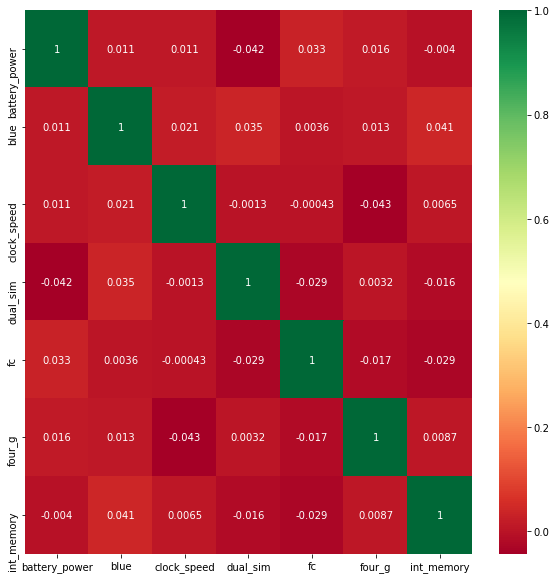

In [20]:
plt.figure(figsize = (10, 10))
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = 'RdYlGn');

### Dealing with missing data

In [26]:
threshold = 0.6
data_1 = data[data.columns[data.isnull().mean() < threshold]] #Drop columns with missing values higher than threshold

data_1 = data_1.loc[data_1.isnull().mean(axis = 1) < threshold] #Drop rows with missing values higher than threshold

print(data_1)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


In [27]:
data_2 = data.fillna(0) #Fill missing values with 0

data_2 = data_2.fillna(data_2.median())

print(data_2)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0               842     0          2.2         0   1       0           7
1              1021     1          0.5         1   0       1          53
2               563     1          0.5         1   2       1          41
3               615     1          2.5         0   0       0          10
4              1821     1          1.2         0  13       1          44
...             ...   ...          ...       ...  ..     ...         ...
1995            794     1          0.5         1   0       1           2
1996           1965     1          2.6         1   0       0          39
1997           1911     0          0.9         1   1       1          36
1998           1512     0          0.9         0   4       1          46
1999            510     1          2.0         1   5       1          45

[2000 rows x 7 columns]


In [28]:
#Categorical imputation for missing data

data = pd.read_csv('data/dataset.csv')

In [29]:
data['color'].fillna(data['color'].value_counts().idxmax(), inplace = True)

print(data)

    index   color
0       0   green
1       1  yellow
2       2    red 
3       3    red 
4       4  purple
5       5    red 
6       6    red 
7       7  purple
8       8    red 
9       9    red 
10     10  yellow
11     11    red 
12     12   black
13     13   white
